In [1]:
!pip install numpy matplotlib
import numpy as np
import matplotlib.pyplot as plt

  Using cached numpy-1.19.2-cp37-cp37m-win_amd64.whl (12.9 MB)
  Using cached matplotlib-3.3.2-cp37-cp37m-win_amd64.whl (8.5 MB)
  Using cached kiwisolver-1.2.0-cp37-none-win_amd64.whl (57 kB)
  Using cached cycler-0.10.0-py2.py3-none-any.whl (6.5 kB)
  Using cached Pillow-7.2.0-cp37-cp37m-win_amd64.whl (2.1 MB)


# Familiarize yourself with the Cole-Cole model
Finish this function

In [2]:
def ColeCole(rho_0, rho_infty, nu, tau, breath):
    omega = nu * 2.*np.pi # convert Hz to angular frequency 
    rho_cc = rho_0*omega + 1j # fix this line, 1j == sqrt(-1) 
    return rho_cc

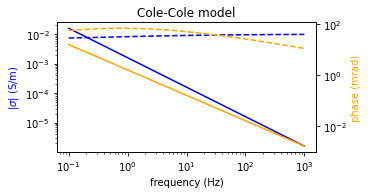

In [3]:
##########################
# Cole-Cole parameters    #
rho_0 = 100               #
rho_infty = 200           #
tau = .2                  #
breath = 0.2              #
##########################

####################################################
####### YOU DON'T NEED TO CHANGE ANYTHING BELOW HERE
####################################################

nu = np.exp(np.linspace(np.log(1e-1),np.log(1e3),100))

# read in saved file
rho1 = np.load("rho.npy", allow_pickle=True)
rho = ColeCole(rho_0, rho_infty, nu, tau, breath)

fig = plt.figure(figsize=[6,3])
ax1 = fig.add_axes([.2,.2,.6,.6])
ax2 = ax1.twinx()
ax2.set_yscale('log')
ax1.set_yscale('log')
ax1.set_xscale('log')
    
ax1.plot(nu, np.abs(1./rho), color='blue')
ax1.plot(nu, np.abs(1./rho1), '--', color='blue')

ax2.plot(nu, 1000.*np.abs(np.angle(1./rho)), color='orange')
ax2.plot(nu, 1000.*np.abs(np.angle(1./rho1)), '--', color='orange')
   
ax2.set_ylabel("phase (mrad)", color='orange') 
ax1.set_ylabel("$|\sigma|$ (S/m)", color='blue') 
ax1.set_xlabel("frequency (Hz)", color='black') 
ax1.set_title("Cole-Cole model") 

# uncomment to save pdf 
plt.savefig("sipfit.pdf", transparent=True)

plt.show()